fase de clasificacion supervisada: preparar cuadernillos con los experimentos, explicar modelos utilizados (reg log, random forest ... cnn), comparar rendimiendo y buscar formas para mejorar

Una vez obtenido un dataset con suficientes noticias de cada categoria objetivo, procedimos a realizar los primeros entrenamientos de distintos modelos de clasificacion supervisada, contemplando tambien una fase de preprocesamiento de la entrada para mejorar en algunos aspectos y simplificar otros...

# Preprocesamiento

## Titulo y cuerpo de la noticia

Como se comento en pasos anteriores, el titulo de una noticia es de gran importancia ya que concentra una gran cantidad de informacion, por lo que es una buena idea incluirlo dentro de los datos con los que se entrenaran nuestros modelos. El dataset contiene una columna 'content' en el que se encuentra el titulo de la noticia mas el cuerpo 

...

In [1]:
import pandas as pd
from pandasql import sqldf

In [2]:
df = pd.read_csv('dataset_paso_3.csv')
pd.set_option('display.max_colwidth', 200)
df[['title', 'content']].head()


,title,content
0,"Vacunación en Chile empezaría primer trimestre del 2021 e incluiría a 15,2 millones de personas","Vacunación en Chile empezaría primer trimestre del 2021 e incluiría a 15,2 millones de personas. Este martes, el Presidente Sebastián Piñera anunció que el plan de vacunación para combatir el cor..."
1,"Sernapesca: ""Viabilidad del virus de infectar es muy baja"" tras hallazgo de COVID-19 en paquete chileno en China","Sernapesca: ""Viabilidad del virus de infectar es muy baja"" tras hallazgo de COVID-19 en paquete chileno en China. La aduana china detectó la presencia del virus COVID-19 en la superficie de una ca..."
2,"Presidente de México asegura que la pandemia ""no nos ha rebasado""","Presidente de México asegura que la pandemia ""no nos ha rebasado"". El presidente de México, Andrés Manuel López Obrador, afirmó que su gobierno ha logrado controlar la pandemia del nuevo coronavir..."
3,Gobierno de Uruguay endurece medidas por aumento sostenido de casos de covid-19,"Gobierno de Uruguay endurece medidas por aumento sostenido de casos de covid-19. El presidente de Uruguay, Luis Lacalle Pou, anunció este martes nuevas medidas para contener el avance de la pandem..."
4,Presidente boliviano destituye a ministro que contrató a su expareja,"Presidente boliviano destituye a ministro que contrató a su expareja. El presidente boliviano, Luis Arce, destituyó este martes a un ministro que contrató como su brazo derecho a una expareja, a q..."


## Truncar contenido


habria que probar si esto mejora los pasos anteriores (lda) xd

In [3]:
lol = df.content.map(len).idxmax()
df.iloc[lol].content # ?????

'Chile: El plebiscito amenazado.  “Los guerreros victoriosos ganan primero y luego van a la guerra, mientras que los guerreros derrotados van a la guerra primero y luego buscan ganar” Sun Tzu 1.-Resumen Ante el próximo plebiscito por una nueva constitución, se analiza y evalúa la actual ofensiva de parte de la derecha para su neutralización. Se busca evitar la opción de Piñera de no realizar el plebiscito, haciendo del apruebo un consenso de gobierno y oposición, generando una situación en que todos estamos por el apruebo, evitando así el triunfo del progresismo y la ciudadanía. Por Alejandro Navarro Brain 2.- Escenarios de la votación para el 25 de octubre 2.1.- Alta participación y alta diferencia de votos 2.2.- Alta participación y baja diferencia de votos 2.3.- Baja participación y alta diferencia de votos 2.4.- Baja participación y baja diferencia de votos. 3.- Estrategias de campaña de la derecha en el plebiscito 3.1.-Pandemia, miedo y abstención: Con la situación de la pandemia,

## Cuanto truncar??

### Por caracteres o por palabras? asegurarse de que la ultima palabra no se corte?

In [4]:
MAX_LEN = 800
FORCE_BALANCE = True
df['content'] = df.content.str.slice(0, MAX_LEN)

In [5]:
print('min len: ', df.content.map(len).min())
print('max len: ', df.content.map(len).max())

min len:  184
max len:  800


In [6]:
q="""SELECT category, count(*) FROM df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,3-Política_y_Conflictos,8977
1,1-Mundo,8609
2,9-Crimen_delitos_y_Justicia,8213
3,7-Deporte,6708
4,4-Ciencias_y_Tecnología,4778
5,10-Salud,2690
6,2-Economía,2636
7,5-Catástrofes_y_Accidentes,1245
8,8-Ecología_y_Planeta,863
9,6-Cultura_y_Artes,795


# balancear el dataset alan tigua?

In [7]:
if FORCE_BALANCE:
    new_df = df.groupby('category').sample(n=795, random_state=2)
    new_df.reset_index(drop=True, inplace=True)
else:
    new_df = df
new_df.head(5)

,id,title,content,category
0,5708146,ONU advierte que la vacuna no basta para enfrentar la devastación del Covid-19,"ONU advierte que la vacuna no basta para enfrentar la devastación del Covid-19. La vacuna contra el Covid-19 no pone fin a la devastación causada por la pandemia en el mundo, alertó el jueves el j...",1-Mundo
1,6664788,11 millones de niñas en el mundo corren el riesgo de no volver a clases por el coronavirus,11 millones de niñas en el mundo corren el riesgo de no volver a clases por el coronavirus. Once millones de niñas en todo el mundo corren el riesgo de no volver a la escuela cuando terminen las r...,1-Mundo
2,14776151,Canciller de Brasil presenta su renuncia tras presiones de legisladores bolsonaristas,"Canciller de Brasil presenta su renuncia tras presiones de legisladores bolsonaristas. El ministro de Relaciones Exteriores de Brasil, Ernesto Araújo , presentó este lunes su renuncia, tras fuert...",1-Mundo
3,5742144,Viajes en un mundo posterior a la pandemia del coronavirus,Viajes en un mundo posterior a la pandemia del coronavirus. Se espera un enfriamiento del romance con las capitales europeas y que exista un nuevo cariño por las ciudades menos pobladas con grande...,1-Mundo
4,14798264,Oposición gana las elecciones presidenciales en las islas Seychelles por primera vez en 40 años,"Oposición gana las elecciones presidenciales en las islas Seychelles por primera vez en 40 años. El opositor Wavel Ramkalawan se convirtió este domingo, con un 54,9% de los votos, en el quinto pr...",1-Mundo


In [8]:
q="""SELECT category, count(*) FROM new_df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,9-Crimen_delitos_y_Justicia,795
1,8-Ecología_y_Planeta,795
2,7-Deporte,795
3,6-Cultura_y_Artes,795
4,5-Catástrofes_y_Accidentes,795
5,4-Ciencias_y_Tecnología,795
6,3-Política_y_Conflictos,795
7,2-Economía,795
8,10-Salud,795
9,1-Mundo,795


# Lo que hice en la tarea de IA 


## Bag of words + tf-idf

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

## NLTK

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize.casual import casual_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics import plot_confusion_matrix, classification_report
#from sklearn.pipeline import Pipeline
from functools import partial

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib notebook
from functools import partial
import numpy as np

from string import punctuation
import re
from tqdm.auto import tqdm
from spacy.lang.es import Spanish
import string
import spacy

In [11]:
#nltk.download('stopwords')
#nltk.download('punkt')

In [12]:
#stopwords
spanish_stopwords = stopwords.words('spanish')

#stemmer
stemmer = SnowballStemmer('spanish')

#puntuacion
non_words = list(punctuation)
#incluir puntuacion del español
non_words.extend(['¿', '¡'])
#numeros
non_words.extend(map(str,range(10)))

# Incluir n-grams?

In [13]:
stemmer = SnowballStemmer('spanish')

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def text_cleaner(text, stem=False):
    # puntuacion
    text = ''.join([c for c in text if c not in non_words])
    # caracteres repetidos, skippeable
    text = re.sub(r'(.)\1+', r'\1\1', text)
    # tokenize
    tokens = casual_tokenize(text, preserve_case=False)
    # quitar stopwords
    filtered_sentence = [w for w in tokens if not w in spanish_stopwords]
    # stemming
    if stem:
        filtered_sentence = stem_tokens(filtered_sentence, stemmer)
    
    return " ".join(filtered_sentence)

In [14]:
train_size = 0.70

In [15]:
train_idxs = new_df.groupby('category').sample(frac=train_size, random_state=2).index
train_df = new_df.iloc[train_idxs]
q="""SELECT category, count(*) FROM train_df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,9-Crimen_delitos_y_Justicia,556
1,8-Ecología_y_Planeta,556
2,7-Deporte,556
3,6-Cultura_y_Artes,556
4,5-Catástrofes_y_Accidentes,556
5,4-Ciencias_y_Tecnología,556
6,3-Política_y_Conflictos,556
7,2-Economía,556
8,10-Salud,556
9,1-Mundo,556


In [16]:
test_idxs = pd.concat([new_df, train_df]).drop_duplicates(keep=False).index
test_df = new_df.iloc[test_idxs]
q="""SELECT category, count(*) FROM test_df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,9-Crimen_delitos_y_Justicia,239
1,8-Ecología_y_Planeta,239
2,7-Deporte,239
3,6-Cultura_y_Artes,239
4,5-Catástrofes_y_Accidentes,239
5,4-Ciencias_y_Tecnología,239
6,3-Política_y_Conflictos,239
7,2-Economía,239
8,10-Salud,239
9,1-Mundo,239


In [17]:
lb = LabelEncoder()
ylabels = new_df['category']
# unique_labels = sorted(ylabels.unique(), key=lambda x : len(x.split('-')[0]))
lb.fit(ylabels.unique())
true_labels = [lb.inverse_transform([i])[0] for i in range(ylabels.nunique())]
ylabels_train_target = lb.fit_transform(ylabels[train_idxs])
ylabels_test_target = lb.fit_transform(ylabels[test_idxs])

# tendriamos que hacer zfill para que queden ordenadas (01-mundo, 02- economia)
# o quitar el numero y ya xd
for label in true_labels:
    print(f" {label:<12} :  {lb.transform([label])[0]}")

 1-Mundo      :  0
 10-Salud     :  1
 2-Economía   :  2
 3-Política_y_Conflictos :  3
 4-Ciencias_y_Tecnología :  4
 5-Catástrofes_y_Accidentes :  5
 6-Cultura_y_Artes :  6
 7-Deporte    :  7
 8-Ecología_y_Planeta :  8
 9-Crimen_delitos_y_Justicia :  9


In [18]:
from spacy.lang.es.stop_words import STOP_WORDS

nlp = spacy.load('es_core_news_md', disable=['parser','ner','textcat','...'] )
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
# nlp = spacy.load("es_core_news_md")
stop_words = STOP_WORDS

stemmer = SnowballStemmer('spanish')

# Creating our tokenizer function
def spacy_tokenizer(sentence, stem=False):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens]
    
    # Removing stop words, ver lo de puntuuacion con  token.tag_
    mytokens = [ word for word in mytokens 
                          if word not in stop_words 
                          and word not in punctuations ]
    if stem:
        mytokens = [ stemmer.stem(word) for word in mytokens ]
    # return preprocessed list of tokens
    return " ".join(mytokens)

In [19]:
contento = new_df.content[5]
print(len(contento))
contento

800


'En previa de reunión de mediadores: Bombardean emblemática catedral en Nagorno Karabaj. Fuerzas armenias y azerbaiyanas continuaban sus combates este jueves en Nagorno Karabaj, donde una emblemática catedral armenia fue bombardeada en dos ocasiones, un mal presagio de cara a la primera reunión en Ginebra de los mediadores internacionales en el conflicto. Los bombardeos azerbaiyanos continuaron durante toda la noche en Stepanakert, capital del territorio separatista, constataron periodistas de la AFP en el lugar. También hubo bombardeos sobre zonas pobladas de Azerbaiyán, según las autoridades de este país. Una iglesia armenia de Shusha, a unos 15 kilómetros al sur de Stepanakert, resultó muy dañada en unos bombardeos este jueves por la mañana, según Ereván, pero Azerbaiyán negó estar impli'

In [20]:
%%timeit
text_cleaner(contento)

1.46 ms ± 55 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%%timeit
# bastante mas lento que el otro, tal vez hay que deshabilitar mas cosas
spacy_tokenizer(contento)

11.7 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
text_cleaner(contento)

'previa reunión mediadores bombardean emblemática catedral nagorno karabaj fuerzas armenias azerbaiyanas continuaban combates jueves nagorno karabaj emblemática catedral armenia bombardeada dos ocasiones mal presagio cara primera reunión ginebra mediadores internacionales conflicto bombardeos azerbaiyanos continuaron toda noche stepanakert capital territorio separatista constataron periodistas afp lugar bombardeos zonas pobladas azerbaiyán según autoridades país iglesia armenia shusha kilómetros sur stepanakert resultó dañada bombardeos jueves mañana según ereván azerbaiyán negó impli'

In [23]:
spacy_tokenizer(contento)

'previa reunión mediador bombardean emblemático catedral nagorno karabaj fuerzas armenia y azerbaiyana continuar combate jueves nagorno karabaj emblemático catedral armenio bombardear ocasión presagio cara a reunión ginebra mediador internacional conflicto bombardeo azerbaiyano continuar noche stepanakert capital territorio separatista constatar periodista afp bombardeo zona poblado azerbaiyán autoridad país iglesia armenio shusha a 15 kilómetro sur stepanakert resultar dañado bombardeo jueves mañana ereván azerbaiyán negar impli'

In [24]:
%%time
# usar spacy_tokenizer aca aumenta bastante el tiempo de ejecucion
vectorizer = TfidfVectorizer(preprocessor=partial(text_cleaner, stem=False))
XD = vectorizer.fit_transform(new_df['content'])
feature_names = vectorizer.get_feature_names()
X_train = XD[train_idxs]
X_test = XD[test_idxs]

CPU times: user 12.8 s, sys: 0 ns, total: 12.8 s
Wall time: 12.8 s


In [25]:
lgr = LogisticRegression(random_state=42, multi_class='ovr', class_weight=None)
lgr.fit(X_train, ylabels_train_target)

LogisticRegression(multi_class='ovr', random_state=42)

In [26]:
#ver efectos de los hiperparametros
rfc = RandomForestClassifier(n_estimators=100, max_depth=100,
              random_state=42, criterion='gini', class_weight=None,
              max_features='sqrt', verbose=0)
rfc.fit(X_train, ylabels_train_target)

RandomForestClassifier(max_depth=100, max_features='sqrt', random_state=42)

In [27]:
from my_funcs import results

Resultados clasificación
LogisticRegression


                             precision    recall  f1-score   support

                    1-Mundo       0.74      0.77      0.76       239
                   10-Salud       0.74      0.81      0.77       239
                 2-Economía       0.82      0.80      0.81       239
    3-Política_y_Conflictos       0.79      0.74      0.77       239
    4-Ciencias_y_Tecnología       0.81      0.76      0.78       239
 5-Catástrofes_y_Accidentes       0.82      0.87      0.85       239
          6-Cultura_y_Artes       0.81      0.82      0.81       239
                  7-Deporte       0.96      0.95      0.95       239
       8-Ecología_y_Planeta       0.91      0.82      0.86       239
9-Crimen_delitos_y_Justicia       0.81      0.83      0.82       239

                   accuracy                           0.82      2390
                  macro avg       0.82      0.82      0.82      2390
               weighted avg       0.82      0.82      0

<IPython.core.display.Javascript object>


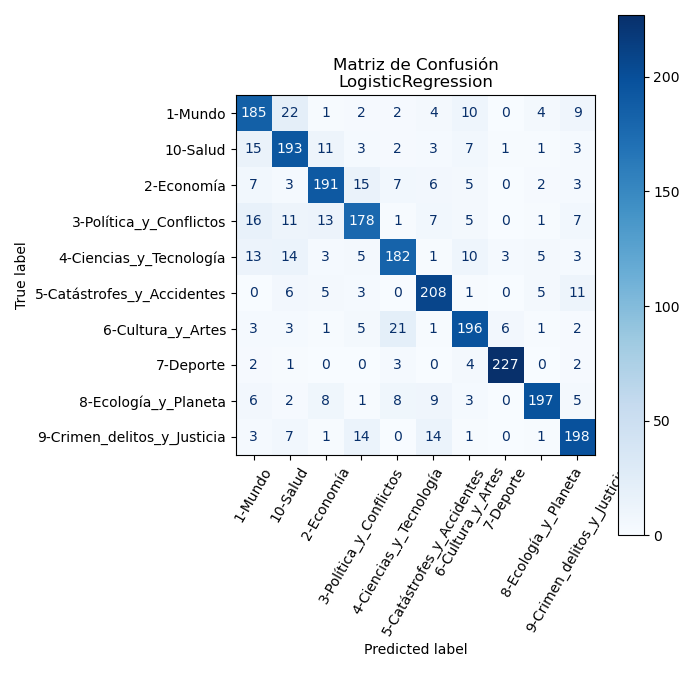

In [28]:
results(ylabels_test_target, lgr, X_test, true_labels)

Resultados clasificación
RandomForestClassifier


                             precision    recall  f1-score   support

                    1-Mundo       0.70      0.62      0.66       239
                   10-Salud       0.65      0.78      0.71       239
                 2-Economía       0.79      0.69      0.73       239
    3-Política_y_Conflictos       0.69      0.72      0.71       239
    4-Ciencias_y_Tecnología       0.68      0.73      0.70       239
 5-Catástrofes_y_Accidentes       0.74      0.87      0.80       239
          6-Cultura_y_Artes       0.83      0.71      0.76       239
                  7-Deporte       0.89      0.94      0.91       239
       8-Ecología_y_Planeta       0.89      0.74      0.81       239
9-Crimen_delitos_y_Justicia       0.75      0.77      0.76       239

                   accuracy                           0.76      2390
                  macro avg       0.76      0.76      0.76      2390
               weighted avg       0.76      0.76   

<IPython.core.display.Javascript object>


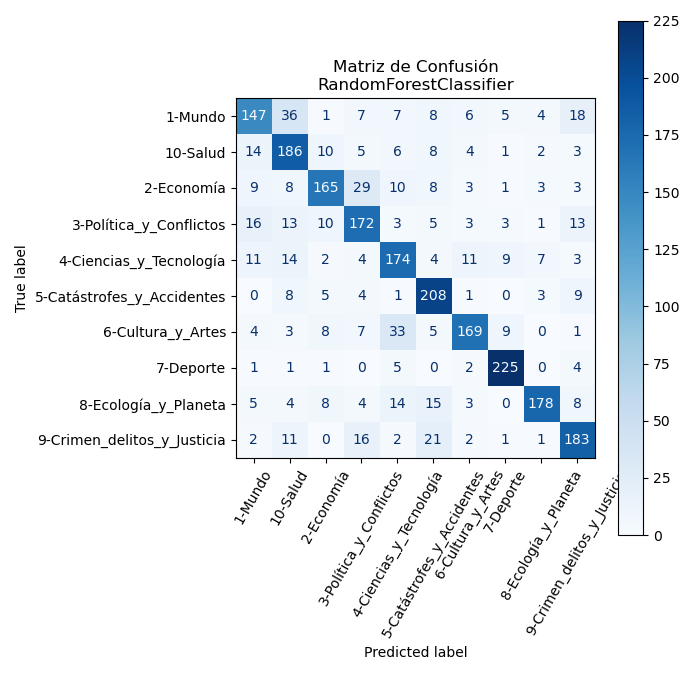

In [29]:
results(ylabels_test_target, rfc, X_test, true_labels)

# comparar rendimiento usando spacy_tokenizer

In [30]:
%%time
vectorizer = TfidfVectorizer(preprocessor=partial(spacy_tokenizer, stem=False))
XD = vectorizer.fit_transform(new_df['content'])
feature_names = vectorizer.get_feature_names()
X_train = XD[train_idxs]
X_test = XD[test_idxs]

CPU times: user 1min 49s, sys: 286 ms, total: 1min 49s
Wall time: 1min 50s


In [31]:
%%time
lgr = LogisticRegression(random_state=42, multi_class='ovr', class_weight=None)
lgr.fit(X_train, ylabels_train_target)

CPU times: user 4.87 s, sys: 104 ms, total: 4.97 s
Wall time: 2.57 s


LogisticRegression(multi_class='ovr', random_state=42)

In [32]:
%%time
rfc = RandomForestClassifier(n_estimators=100, max_depth=100,
              random_state=42, criterion='gini', class_weight=None,
              max_features='sqrt', verbose=0)
rfc.fit(X_train, ylabels_train_target)

CPU times: user 8.47 s, sys: 51.9 ms, total: 8.53 s
Wall time: 8.34 s


RandomForestClassifier(max_depth=100, max_features='sqrt', random_state=42)

Resultados clasificación
LogisticRegression


                             precision    recall  f1-score   support

                    1-Mundo       0.76      0.75      0.76       239
                   10-Salud       0.76      0.84      0.80       239
                 2-Economía       0.83      0.82      0.83       239
    3-Política_y_Conflictos       0.80      0.74      0.77       239
    4-Ciencias_y_Tecnología       0.80      0.76      0.78       239
 5-Catástrofes_y_Accidentes       0.80      0.89      0.84       239
          6-Cultura_y_Artes       0.84      0.82      0.83       239
                  7-Deporte       0.95      0.95      0.95       239
       8-Ecología_y_Planeta       0.88      0.83      0.86       239
9-Crimen_delitos_y_Justicia       0.83      0.83      0.83       239

                   accuracy                           0.82      2390
                  macro avg       0.83      0.82      0.82      2390
               weighted avg       0.83      0.82      0

<IPython.core.display.Javascript object>


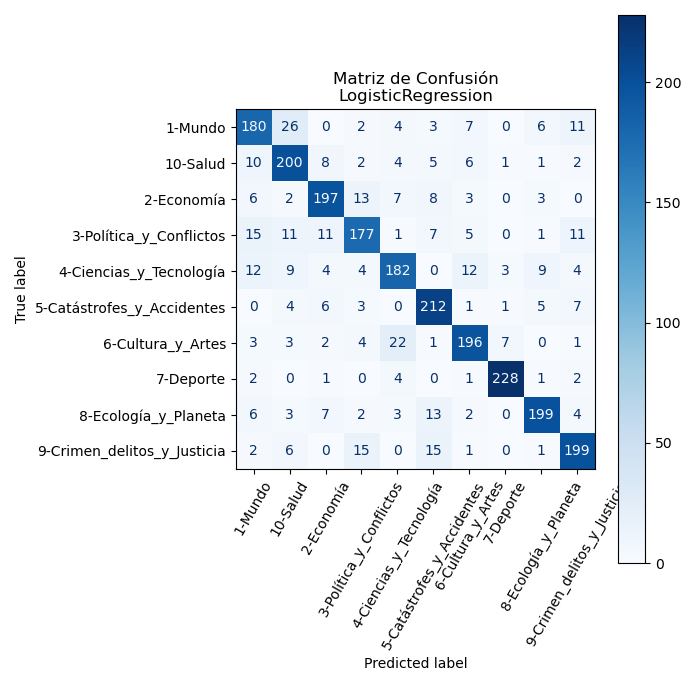

In [33]:
results(ylabels_test_target, lgr, X_test, true_labels)

# rfc anda mejor con spacy_tokenizer

Resultados clasificación
RandomForestClassifier


                             precision    recall  f1-score   support

                    1-Mundo       0.77      0.64      0.70       239
                   10-Salud       0.65      0.79      0.71       239
                 2-Economía       0.78      0.69      0.73       239
    3-Política_y_Conflictos       0.72      0.77      0.74       239
    4-Ciencias_y_Tecnología       0.72      0.73      0.73       239
 5-Catástrofes_y_Accidentes       0.73      0.84      0.78       239
          6-Cultura_y_Artes       0.82      0.72      0.76       239
                  7-Deporte       0.91      0.95      0.93       239
       8-Ecología_y_Planeta       0.90      0.80      0.85       239
9-Crimen_delitos_y_Justicia       0.75      0.79      0.77       239

                   accuracy                           0.77      2390
                  macro avg       0.78      0.77      0.77      2390
               weighted avg       0.78      0.77   

<IPython.core.display.Javascript object>


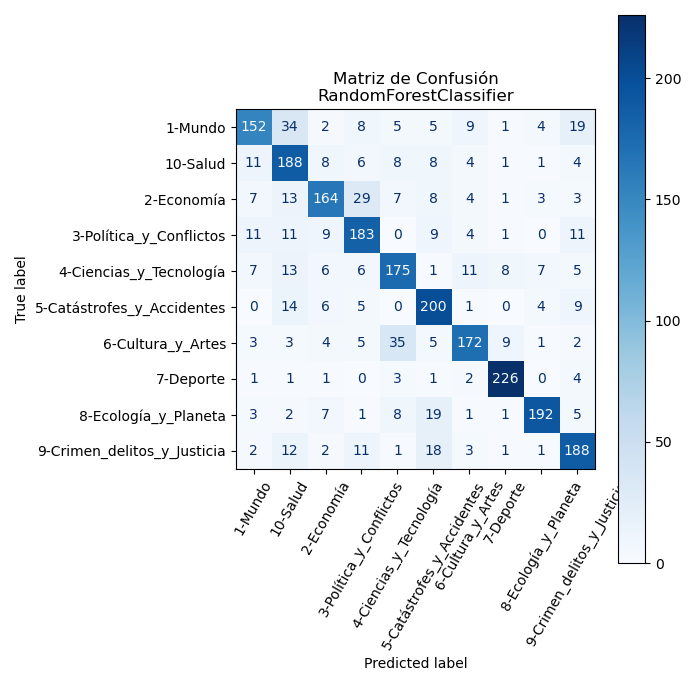

In [34]:
results(ylabels_test_target, rfc, X_test, true_labels)

# cnn

In [35]:
new_df

,id,title,content,category
0,5708146,ONU advierte que la vacuna no basta para enfrentar la devastación del Covid-19,"ONU advierte que la vacuna no basta para enfrentar la devastación del Covid-19. La vacuna contra el Covid-19 no pone fin a la devastación causada por la pandemia en el mundo, alertó el jueves el j...",1-Mundo
1,6664788,11 millones de niñas en el mundo corren el riesgo de no volver a clases por el coronavirus,11 millones de niñas en el mundo corren el riesgo de no volver a clases por el coronavirus. Once millones de niñas en todo el mundo corren el riesgo de no volver a la escuela cuando terminen las r...,1-Mundo
2,14776151,Canciller de Brasil presenta su renuncia tras presiones de legisladores bolsonaristas,"Canciller de Brasil presenta su renuncia tras presiones de legisladores bolsonaristas. El ministro de Relaciones Exteriores de Brasil, Ernesto Araújo , presentó este lunes su renuncia, tras fuert...",1-Mundo
3,5742144,Viajes en un mundo posterior a la pandemia del coronavirus,Viajes en un mundo posterior a la pandemia del coronavirus. Se espera un enfriamiento del romance con las capitales europeas y que exista un nuevo cariño por las ciudades menos pobladas con grande...,1-Mundo
4,14798264,Oposición gana las elecciones presidenciales en las islas Seychelles por primera vez en 40 años,"Oposición gana las elecciones presidenciales en las islas Seychelles por primera vez en 40 años. El opositor Wavel Ramkalawan se convirtió este domingo, con un 54,9% de los votos, en el quinto pr...",1-Mundo
...,...,...,...,...
7945,5815421,Inicia juicio histórico para esclarecer “vuelos de la muerte” durante dictadura argentina,"Inicia juicio histórico para esclarecer “vuelos de la muerte” durante dictadura argentina. Los procesos judiciales sobre los llamados “vuelos de la muerte” desde Campo de Mayo, uno de los centros ...",9-Crimen_delitos_y_Justicia
7946,4683781,Caso Corpesca: Fiscalía pide 11 años de cárcel para Orpis y 818 días de presidio para Isasi,Caso Corpesca: Fiscalía pide 11 años de cárcel para Orpis y 818 días de presidio para Isasi. Luego de que ayer el Tercer Tribunal Oral en lo Penal de Santiago entregara el veredicto en el caso Cor...,9-Crimen_delitos_y_Justicia
7947,13490868,Contraloría denuncia irregularidades en compra de terreno de $9.800 millones por parte de la Intendencia de Coquimbo,Contraloría denuncia irregularidades en compra de terreno de $9.800 millones por parte de la Intendencia de Coquimbo. La Contraloría General de la República denunció un presunto caso de fraude al...,9-Crimen_delitos_y_Justicia
7948,4060291,Se imputarán 109 cargos: PDI detiene a 12 personas por daños causados en la Universidad de Concepción,"Se imputarán 109 cargos: PDI detiene a 12 personas por daños causados en la Universidad de Concepción. Este lunes, la Policía de Investigaciones (PDI) de Concepción detuvo a 12 hombres por su pres...",9-Crimen_delitos_y_Justicia


In [36]:
from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [37]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.45, random_state=42)
for train_index, test_valid_index in split.split(new_df, new_df.category):
    train = new_df.iloc[train_index]
    test_valid_set = new_df.iloc[test_valid_index]

split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.75, random_state=42)
for test_index, valid_index in split2.split(test_valid_set, test_valid_set.category):
    test = test_valid_set.iloc[test_index]
    valid = test_valid_set.iloc[valid_index]



#valid, test, train = np.split(new_df, [ int(.15*len(new_df)), int(.3*len(new_df))] )

In [38]:
print(new_df.shape)
print(train.shape)
print(valid.shape)
print(test.shape)

(7950, 4)
(4372, 4)
(2684, 4)
(894, 4)


In [39]:
display(train.groupby(['category']).size())
display(valid.groupby(['category']).size())
display(test.groupby(['category']).size())

category
1-Mundo                        437
10-Salud                       438
2-Economía                     437
3-Política_y_Conflictos        437
4-Ciencias_y_Tecnología        437
5-Catástrofes_y_Accidentes     437
6-Cultura_y_Artes              437
7-Deporte                      437
8-Ecología_y_Planeta           438
9-Crimen_delitos_y_Justicia    437
dtype: int64

category
1-Mundo                        268
10-Salud                       268
2-Economía                     268
3-Política_y_Conflictos        269
4-Ciencias_y_Tecnología        269
5-Catástrofes_y_Accidentes     269
6-Cultura_y_Artes              268
7-Deporte                      269
8-Ecología_y_Planeta           268
9-Crimen_delitos_y_Justicia    268
dtype: int64

category
1-Mundo                        90
10-Salud                       89
2-Economía                     90
3-Política_y_Conflictos        89
4-Ciencias_y_Tecnología        89
5-Catástrofes_y_Accidentes     89
6-Cultura_y_Artes              90
7-Deporte                      89
8-Ecología_y_Planeta           89
9-Crimen_delitos_y_Justicia    90
dtype: int64

In [40]:
test.category.unique()

array(['3-Política_y_Conflictos', '1-Mundo', '5-Catástrofes_y_Accidentes',
       '10-Salud', '9-Crimen_delitos_y_Justicia',
       '4-Ciencias_y_Tecnología', '8-Ecología_y_Planeta', '2-Economía',
       '7-Deporte', '6-Cultura_y_Artes'], dtype=object)

In [41]:
train.to_csv("CNN_train.csv", encoding="UTF-8",index=False)
valid.to_csv("CNN_valid.csv", encoding="UTF-8",index=False)
test.to_csv("CNN_test.csv", encoding="UTF-8",index=False)

In [42]:
import torch
import spacy
import random
import torchtext
from torchtext import data
from torchtext import datasets
from torchtext.legacy import data

In [43]:
spacy_es = spacy.load('es_core_news_sm')

In [44]:
def tokenize_es(sentence):
    return [tok.text for tok in spacy_es.tokenizer(sentence)]

In [45]:
TEXT = data.Field(tokenize=tokenize_es, batch_first = True)
CATEGORY = data.LabelField()  # MULTICLASS -se borró el argumento "(dtype = torch.float)"

In [46]:
CATEGORY

In [66]:
fields = [(None, None),(None, None),('content', TEXT),('category', CATEGORY)]

In [67]:
import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

train_data, valid_data, test_data = data.TabularDataset.splits(
                                        path = '.',
                                        train = 'CNN_train.csv',
                                        validation= 'CNN_valid.csv',
                                        test = 'CNN_test.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)


In [68]:
BATCH_SIZE = 32
device = torch.device('cpu')
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
                                                    (train_data, valid_data, test_data), 
                                                    batch_size = BATCH_SIZE, 
                                                    device = device,
                                                    sort_key=lambda x:len(x.category),
                                                    sort_within_batch=False)

cpu


In [69]:
#!wget http://dcc.uchile.cl/~jperez/word-embeddings/glove-sbwc.i25.vec.gz

In [70]:
MAX_VOCAB_SIZE = 50000

## TENER VECTORES EN ESPAÑOL
vec = torchtext.vocab.Vectors('glove-sbwc.i25.vec.gz', cache='.')
TEXT.build_vocab(train_data,
                 vectors=vec,
                 max_size=MAX_VOCAB_SIZE,
                 unk_init=torch.Tensor.normal_)


In [71]:
CATEGORY.build_vocab(train_data)

In [72]:
cat_map = { v: k for k, v in CATEGORY.vocab.stoi.items()}
cat_map

{0: '10-Salud',
 1: '8-Ecología_y_Planeta',
 2: '1-Mundo',
 3: '2-Economía',
 4: '3-Política_y_Conflictos',
 5: '4-Ciencias_y_Tecnología',
 6: '5-Catástrofes_y_Accidentes',
 7: '6-Cultura_y_Artes',
 8: '7-Deporte',
 9: '9-Crimen_delitos_y_Justicia'}

In [73]:
print(CATEGORY.vocab.stoi)

defaultdict(None, {'10-Salud': 0, '8-Ecología_y_Planeta': 1, '1-Mundo': 2, '2-Economía': 3, '3-Política_y_Conflictos': 4, '4-Ciencias_y_Tecnología': 5, '5-Catástrofes_y_Accidentes': 6, '6-Cultura_y_Artes': 7, '7-Deporte': 8, '9-Crimen_delitos_y_Justicia': 9})


In [74]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
                                    nn.Conv1d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        
        #text = text.permute(1, 0)
                
        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
        
        return self.fc(cat)

In [75]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
N_FILTERS = 100
FILTER_SIZES = [2,3,4]
OUTPUT_DIM = len(CATEGORY.vocab) ##### MULTICLASS ---> la dimensión del output no es 1 (clasificación binaria)
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
model = model.to(device)

In [76]:
OUTPUT_DIM

10

In [77]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 12,944,710 trainable parameters


In [78]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [79]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss() #MULTICLASS ---> en lugar de .BCEWithLogitsLoss() (Binary Cross Entropy)


criterion = criterion.to(device)

In [80]:
from tqdm import tqdm
def train(model, iterator, optimizer, criterion, divisor):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc='train'):
        
        optimizer.zero_grad()
        
        #print("Tamaño texto de entrada:"+str(batch.body.shape))
        
        predictions = model(batch.content)
        
        #print("Tamaño predecciones de salida:"+str(predictions.shape)) 
        
        #print("Tamaño target:"+str(batch.category.shape)) 
        
        loss = criterion(predictions, batch.category)
        
        acc = categorical_accuracy(predictions, batch.category, divisor)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [81]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [82]:
def categorical_accuracy(preds, y, divisor):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / divisor([y.shape[0]])

In [83]:
def evaluate(model, iterator, criterion, divisor):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in tqdm(iterator, desc='eval'):

            predictions = model(batch.content)
            
            loss = criterion(predictions, batch.category)
            
            acc = categorical_accuracy(predictions, batch.category, divisor)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)



In [84]:
from datetime import datetime
print("inicio optimización")

N_EPOCHS = 5 #5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    divisor = torch.FloatTensor if device == 'cpu' else torch.cuda.FloatTensor
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, divisor)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, divisor)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        dt = str(datetime.now()).replace(' ', '_')
        name = f'./tematic-model-CNN_ep{str(epoch+1)}_{dt}.pt'
        torch.save({'epoca': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'Valid_loss': best_valid_loss}, name)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')


inicio optimización


eval: 100%|█████████████████████████████████████| 84/84 [00:09<00:00,  8.44it/s]


Epoch: 01 | Epoch Time: 1m 17s
	Train Loss: 1.693 | Train Acc: 43.13%
	 Val. Loss: 1.010 |  Val. Acc: 70.25%


eval: 100%|█████████████████████████████████████| 84/84 [00:10<00:00,  7.73it/s]


Epoch: 02 | Epoch Time: 1m 18s
	Train Loss: 0.932 | Train Acc: 69.79%
	 Val. Loss: 0.795 |  Val. Acc: 76.10%


eval: 100%|█████████████████████████████████████| 84/84 [00:10<00:00,  7.85it/s]


Epoch: 03 | Epoch Time: 1m 16s
	Train Loss: 0.628 | Train Acc: 80.72%
	 Val. Loss: 0.723 |  Val. Acc: 76.88%


eval: 100%|█████████████████████████████████████| 84/84 [00:09<00:00,  8.41it/s]


Epoch: 04 | Epoch Time: 1m 14s
	Train Loss: 0.439 | Train Acc: 86.96%
	 Val. Loss: 0.702 |  Val. Acc: 77.84%


eval: 100%|█████████████████████████████████████| 84/84 [00:09<00:00,  8.49it/s]


Epoch: 05 | Epoch Time: 1m 14s
	Train Loss: 0.287 | Train Acc: 91.98%
	 Val. Loss: 0.673 |  Val. Acc: 78.96%


In [85]:
INPUT_DIM

42238

In [86]:
len(TEXT.vocab.vectors)

42238

In [87]:
best_model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

In [88]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

best_model.embedding.weight.data.copy_(pretrained_embeddings)
best_model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
best_model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [90]:
name = 'tematic-model-CNN_ep4_2021-11-24_02:47:19.120405.pt'
best_model.load_state_dict(torch.load(name, map_location=torch.device('cpu'))['model_state_dict'])

<All keys matched successfully>

In [91]:
test_loss, test_acc = evaluate(model, test_iterator, criterion, divisor)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

eval: 100%|█████████████████████████████████████| 28/28 [00:03<00:00,  7.02it/s]

Test Loss: 0.636 | Test Acc: 81.01%


In [92]:
prediction_test = []
labels_test=[]
for batch in test_iterator:
    labels_test.append(batch.category.cpu().detach().numpy())
    predictions = best_model(batch.content.cpu()).squeeze(1)
    #print(torch.sigmoid(predictions))
    rounded_preds = torch.round(torch.sigmoid(predictions))
    prediction_test.append(rounded_preds.detach().numpy())
    #print(prediction_test)
    

y_true = np.concatenate(labels_test)
y_pred = np.concatenate(prediction_test)

In [118]:
def predict_class(model, sentence, min_len = 4):

    tokenized = [tok.text for tok in spacy_es.tokenizer(sentence)]
    
    if len(tokenized) < min_len:
        tokenized += ['<pad>'] * (min_len - len(tokenized))
    device = 'cpu'
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(0)
    preds = model(tensor)
    print(preds)
    max_preds = preds.argmax(dim = 1)
    return max_preds.item()

In [119]:
noticia = """Sin embargo, estos experimentos se llevaban a cabo en secreto, y cuando otras secciones de Guardian se dieron cuenta, el proyecto se canceló de inmediato."""
cat_map.get(predict_class(best_model, noticia))

tensor([[-0.0990,  0.1399, -0.6579, -0.3857,  0.1549,  0.4725, -0.3092, -0.1642,
         -0.6675, -0.3441]], grad_fn=<AddmmBackward>)


'4-Ciencias_y_Tecnología'

In [130]:
cat_map.get(predict_class(best_model, "golazo del bicho vs villareal"))

tensor([[-0.8841, -0.9195, -1.3896, -0.5620, -0.5698,  0.1720, -0.4745,  0.2875,
          2.3415, -0.7382]], grad_fn=<AddmmBackward>)


'7-Deporte'

# pensar en una forma para comparar el rendimiento de los modelos dependiendo de cosas generales como que tokenizer usamos, usar stem o no, largo a truncar, balancear dataset, etc.

por ejemplo una tabla resumen con la configuracion y los avg de precision, acc

In [ ]:
## wena